In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [86]:
data = load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [87]:
x = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)

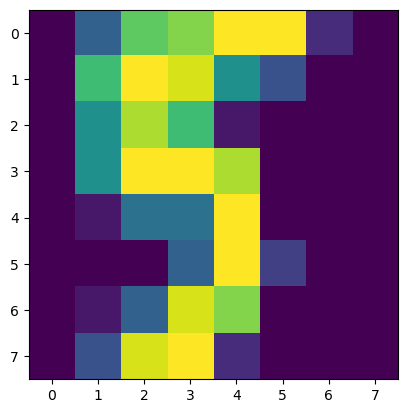

In [88]:
plt.imshow(np.reshape(x.loc[15,:],(8,8)))

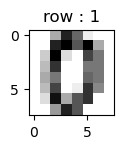

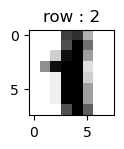

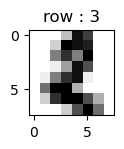

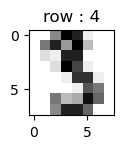

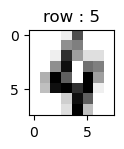

In [89]:
for index, (data, image) in enumerate(zip(data.data[0:5],data.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(data,(8,8)),cmap=plt.cm.gray_r)
    plt.title(f'row : {index+1}')
    plt.show()

In [90]:
x.shape

(1797, 64)

In [91]:
y.shape

(1797, 1)

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [93]:
sc = StandardScaler()

In [101]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [102]:
x_test.shape

(360, 64)

In [103]:
x_train.shape

(1437, 64)

In [99]:
lda = LinearDiscriminantAnalysis(n_components=9)

In [104]:
x_train = lda.fit_transform(x_train,y_train)
x_test = lda.transform(x_test)

C:\Users\sonip\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
x_test.shape

(360, 9)

In [106]:
x_train.shape

(1437, 9)

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [109]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

In [110]:
rfc.fit(x_train,y_train)

C:\Users\sonip\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [111]:
y_pred = rfc.predict(x_test)

In [112]:
accuracy_score(y_test,y_pred)

0.9527777777777777